<a href="https://colab.research.google.com/github/VAISHNAVI02210/Codsoft_Intership/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT INTERNSHIP**

TASK - 1 : Titanic Survival Prediction

Author : vaishnavi kale

Domain : Data Science

Batch : december 25

# AIM

The aim of the Titanic Survival Prediction project using data science is to develop a predictive model that accurately predicts the survival chances of passengers aboard the Titanic based on various features such as age, gender, passenger class, and others. By applying machine learning algorithms, data preprocessing, and feature engineering, this project seeks to analyze and understand the factors contributing to survival rates, and provide insights into the patterns and trends that affected survival outcomes during the Titanic disaster. The ultimate goal is to create a reliable classification model that can predict the likelihood of survival for new, unseen data.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

# Load the dataset with the correct file path
data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')


In [ ]:
# Display the first few rows of the dataset
print("Dataset preview:")
print(data.head())

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

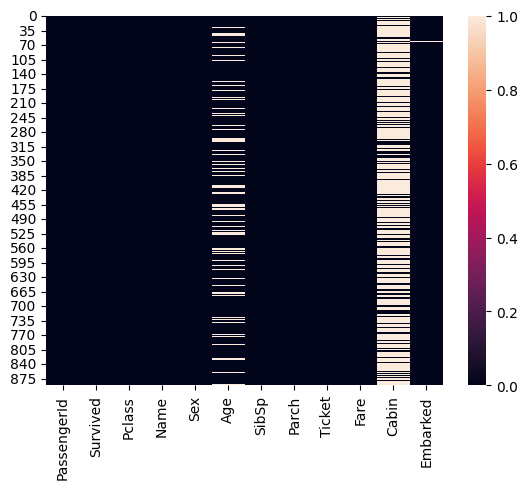

In [ ]:
# Visualizing the missing values using heatmap
sns.heatmap(data.isnull())

In [ ]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
ports = pd.get_dummies(data.Embarked, prefix='Embarked', dtype=int)
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
data = data.join(ports)

In [ ]:
data.drop(['Embarked'],axis=1, inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


In [ ]:
# Drop the 'Cabin' column due to many missing values
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.isnull().sum()

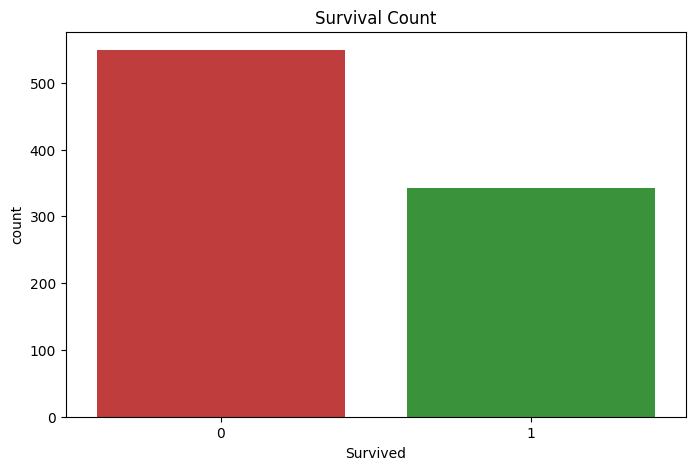

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Survived', palette=['#d62728','#2ca02c'])
plt.title("Survival Count")
plt.show()

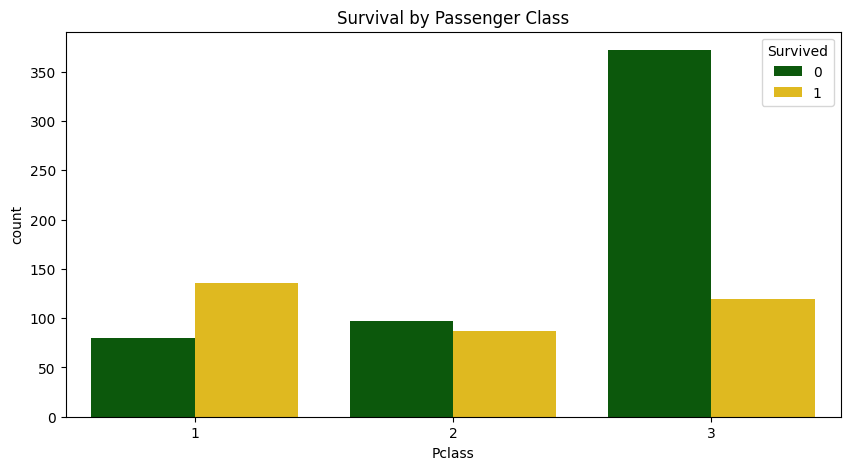

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Pclass', hue='Survived', palette=['#006400', '#FFCC00'])
plt.title("Survival by Passenger Class")
plt.show()

In [ ]:
data.Sex=data.Sex.map({'male':0,'female':1})

In [ ]:
#Splitting the data
Y= data.Survived.copy()
X= data.drop(['Survived'], axis = 1)

In [ ]:
X.drop(['Cabin','Ticket', 'Name', 'PassengerId'], axis=1, inplace=True, errors='ignore')


In [ ]:
X.isnull().sum()

Pclass      0
Sex       891
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# As per prior result we have null values in the Age Component, we are replacing the null values with mean
X.Age.fillna(X.Age.mean(),inplace=True)

In [ ]:
# Checking any null values present
X.isnull().values.any()

True

In [ ]:
#Import libraries for Model buliding
from sklearn.model_selection import train_test_split

#Spliting the data to train our model and test its accuracy
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [ ]:
#Import Regression libraries for Model buliding
from sklearn.linear_model import LogisticRegression

#Initialize it to a name
model = LogisticRegression()

In [ ]:
X_train.dropna(inplace=True)
Y_train = Y_train[X_train.index]  # Ensure target variable is aligned after dropping rows


In [ ]:
LogisticRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
print(X_train.shape)
print(Y_train.shape)


(0, 6)
(0,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(Y_train.shape)


(712, 6)
(712,)


In [ ]:
X_test.dropna(inplace=True)
Y_test = Y_test[X_test.index]  # Ensure that the target is aligned after dropping rows


In [ ]:
# Predict on the model
Y_pred_test= model.predict(X_test)
Y_pred_test

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by LogisticRegression.

In [ ]:
# Check the shape of X_test and Y_test
print("Shape of X_test:", X_test.shape)  # This should return (n_samples, n_features)
print("Shape of Y_test:", Y_test.shape)  # This should match the number of rows in X_test


Shape of X_test: (0, 6)
Shape of Y_test: (0,)


In [ ]:
from sklearn.model_selection import train_test_split

# Make sure X and Y are properly defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Confirm that X_test is not empty
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (712, 6)
Shape of X_test: (179, 6)


In [ ]:
# Check for missing values in X_test
print(X_test.isnull().sum())  # Shows how many missing values are in each column


Pclass      0
Sex       179
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImpute

imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent'
X_test = imputer.fit_transform(X_test)


In [ ]:

import pandas as pd

# Example of creating a DataFrame
X = pd.DataFrame({
    'Age': [25, 30, None, 40, None]  # 'None' values to represent missing data
})

# Now fill missing values in the 'Age' column with the mean
X['Age'].fillna(X['Age'].mean(), inplace=True)

print(X)


         Age
0  25.000000
1  30.000000
2  31.666667
3  40.000000
4  31.666667


In [ ]:

# Checking any null values present
X.isnull().values.any()

False

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example DataFrame
df = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 70000, 80000, 90000],
    'Purchased': [1, 0, 1, 0, 1]  # Target variable (Y)
})

# Define X (features) and Y (target)
X = df[['Age', 'Salary']]  # Selecting 'Age' and 'Salary' as features
Y = df['Purchased']  # Selecting 'Purchased' as the target variable

# Now, split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Check the resulting splits
print(X_train)
print(Y_train)


   Age  Salary
3   40   80000
2   35   70000
1   30   60000
4   45   90000
3    0
2    1
1    0
4    1
Name: Purchased, dtype: int64


In [ ]:
#Import Regression libraries for Model buliding
from sklearn.linear_model import LogisticRegression

#Initialize it to a name
model = LogisticRegression()

In [ ]:
#Fitting our data to the model
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
model.score(X_train,Y_train)

0.5

In [ ]:
# Predict on the model
Y_pred_test= model.predict(X_test)
Y_pred_test

array([1])

In [ ]:
#Import Metrics to Check Accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test)))

Model accuracy score: 1.0000


In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created.")


NameError: name 'pd' is not defined

In [ ]:
import pandas as pd


In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")
